In [212]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [213]:
from eff_mass_plot import *
from jk import *
from utils import *
import matplotlib as mpl

import lsqfit

NT=64

mpl.rcParams.update({'font.size': 14})

In [214]:
print((1500-100)/5)
print((700-100)/5)

280.0
120.0


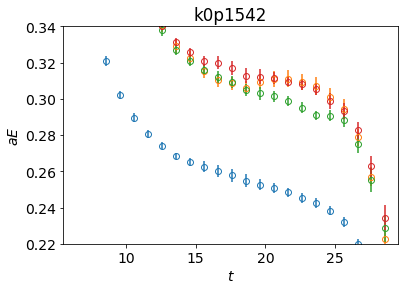

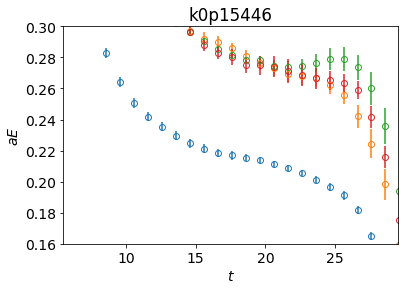

In [215]:
cut=120
b=10

kappa="k0p1542"
corrPI=np.array(get_data(kappa,5,NT))
corrRHO=[np.array(get_data(kappa,i+1,NT)) for i in range(3)]

data=jackKnife(log_eff_mass, corrPI[cut:,:], b)
plt.errorbar([t+0.12*i for t in range(int(NT/2)-1)], data[0], data[1], linestyle="None", marker="o", markerfacecolor="None")
for corr in corrRHO:
    data=jackKnife(log_eff_mass, corr[cut:,:], b)
    plt.errorbar([t+0.12*i for t in range(int(NT/2)-1)], data[0], data[1], linestyle="None", marker="o", markerfacecolor="None")
plt.xlim(5.5,29.5)
plt.ylim(0.22,0.34)
plt.xlabel(r'$t$')
plt.ylabel(r'$aE$')
plt.title(kappa)
plt.show()

kappa="k0p15446"
corrPI=np.array(get_data(kappa,5,NT))
corrRHO=[np.array(get_data(kappa,i+1,NT)) for i in range(3)]

data=jackKnife(log_eff_mass, corrPI[cut:,:], b)
plt.errorbar([t+0.12*i for t in range(int(NT/2)-1)], data[0], data[1], linestyle="None", marker="o", markerfacecolor="None")
for corr in corrRHO:
    data=jackKnife(log_eff_mass, corr[cut:,:], b)
    plt.errorbar([t+0.12*i for t in range(int(NT/2)-1)], data[0], data[1], linestyle="None", marker="o", markerfacecolor="None")
plt.xlim(5.5,29.5)
plt.ylim(0.16,0.3)
plt.xlabel(r'$t$')
plt.ylabel(r'$aE$')
plt.title(kappa)
plt.show()


In [216]:
print(0.25/0.31)
print(0.21/0.28)

0.8064516129032259
0.7499999999999999


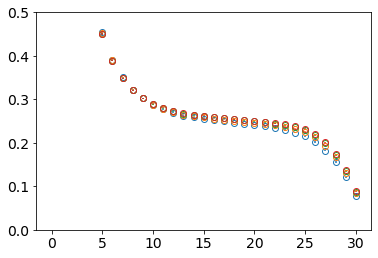

In [185]:
for cut in [0, 50, 100, 120]:
    data =jackKnife(log_eff_mass, corrPI[cut:,:])

    plt.errorbar([t for t in range(int(NT/2)-1)], data[0], data[1], linestyle="None", marker="o", markerfacecolor="None")
    plt.ylim(0,0.5)

In [1]:
(1500-700)/5/40

4.0

160


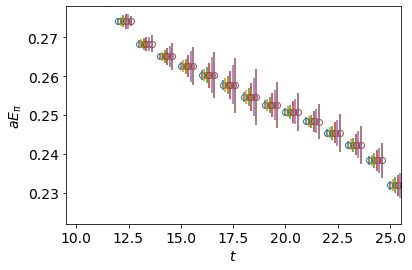

In [187]:
cut=120
print(len(corrPI[cut:,0]))
for i,b in enumerate([1,2,4,10,20,40]):
    data =jackKnife(log_eff_mass, corrPI[cut:,:], b)
    
    plt.errorbar([t+0.12*i for t in range(int(NT/2)-1)], data[0], data[1], linestyle="None", marker="o", markerfacecolor="None")
    plt.ylim(0.222,0.278)
    plt.xlim(9.5,25.5)
plt.xlabel(r'$t$')
plt.ylabel(r'$aE_{\pi}$')
plt.show()

In [243]:
def cosh_fit(x,p,NT):
    return p['a']*np.cosh(p['E']*(x-(NT/2)))

def three_exp(t,p):
    return p['a0']*np.exp(-p['E0']*t)+p['a1']*np.exp(-p['E1']*t)+p['a2']*np.exp(-p['E2']*t)

cosh_nt = lambda x,p : cosh_fit(x,p,NT)

def get_best_cosh_fit(fitData):
    bestFit =   fit=lsqfit.nonlinear_fit(
                    data=(ts[0:32+1],fitData[0][0:32+1],fitData[1][0:32+1,0:32+1]),
                    fcn=cosh_nt,
                    p0={'a': 1.0, 'E': 0.2}
                )
    bestFitTimes = [0,32]

    for ti in range(0,22):
        for tf in range(26,32):
            if tf-ti>2:

                fit=lsqfit.nonlinear_fit(
                        data=(ts[ti:tf+1],fitData[0][ti:tf+1],fitData[1][ti:tf+1,ti:tf+1]),
                        fcn=cosh_nt,
                        p0={'a': 1.0, 'E': 0.2}
                    )
                if fit.chi2 < bestFit.chi2:
                    bestFit=fit
                    bestFitTimes=[ti,tf]
    
    return bestFit, bestFitTimes

def get_best_exp_fit(fitData):
    bestFit =   fit=lsqfit.nonlinear_fit(
                    data=(ts[0:32+1],fitData[0][0:32+1],fitData[1][0:32+1,0:32+1]),
                    fcn=three_exp,
                    p0={'a0': 1.0, 'E0': 0.2, 'a1': 0.001, 'E1': 0.05, 'a2': 0.1, 'E2': 2.2}
                )
    bestFitTimes = [0,32]

    for ti in range(0,12):
        for tf in range(22,32):
            if tf-ti>2:

                fit=lsqfit.nonlinear_fit(
                        data=(ts[ti:tf+1],fitData[0][ti:tf+1],fitData[1][ti:tf+1,ti:tf+1]),
                        fcn=three_exp,
                        p0={'a0': 1.0, 'E0': 0.2, 'a1': 0.001, 'E1': 0.05, 'a2': 0.1, 'E2': 2.2}
                    )
                if fit.chi2 < bestFit.chi2:
                    bestFit=fit
                    bestFitTimes=[ti,tf]
    
    return bestFit, bestFitTimes

In [244]:
kappa="k0p1542"
corrPI=np.array(get_data(kappa,5,NT))
corrRHO=(np.array(get_data(kappa,1,NT))+np.array(get_data(kappa,2,NT))+np.array(get_data(kappa,3,NT)))/3.0
ts = np.array([t for t in range(int(NT/2))])

cut=120
bin=10

nmean = lambda data : np.mean(data,axis=0)

fitData=jackKnifeCov(nmean, corrPI[cut:,:], bin)
pibestFit, pibestFitTimes = get_best_cosh_fit(fitData)
pibestFit2, pibestFit2Times = get_best_exp_fit(fitData)

fitData=jackKnifeCov(nmean, corrRHO[cut:,:], bin)
rhobestFit, rhobestFitTimes = get_best_cosh_fit(fitData)
rhobestFit2, rhobestFit2Times = get_best_exp_fit(fitData)



pidata=jackKnife(log_eff_mass, corrPI[cut:,:], bin)
rhodata=jackKnife(log_eff_mass, corrRHO[cut:,:], bin)

paramsDict = lambda d : {key: d[key].mean for key in d}

pifitparams=paramsDict(pibestFit.p)
pifitFuncdata=[np.log(cosh_fit(t,pifitparams,NT)/cosh_fit(t+1,pifitparams,NT)) for t in range(pibestFitTimes[0], pibestFitTimes[1]+1)]
pifit2params=paramsDict(pibestFit2.p)
pifit2Funcdata=[np.log(three_exp(t,pifit2params)/three_exp(t+1,pifit2params)) for t in range(pibestFit2Times[0], pibestFit2Times[1]+1)]

rhofitparams=paramsDict(rhobestFit.p)
rhofitFuncdata=[np.log(cosh_fit(t,rhofitparams,NT)/cosh_fit(t+1,rhofitparams,NT)) for t in range(rhobestFitTimes[0], rhobestFitTimes[1]+1)]
rhofit2params=paramsDict(rhobestFit2.p)
rhofit2Funcdata=[np.log(three_exp(t,rhofit2params)/three_exp(t+1,rhofit2params)) for t in range(rhobestFit2Times[0], rhobestFit2Times[1]+1)]

/tmp/ipykernel_2451/1471656247.py:5: RuntimeWarning: overflow encountered in exp
  return p['a0']*np.exp(-p['E0']*t)+p['a1']*np.exp(-p['E1']*t)+p['a2']*np.exp(-p['E2']*t)


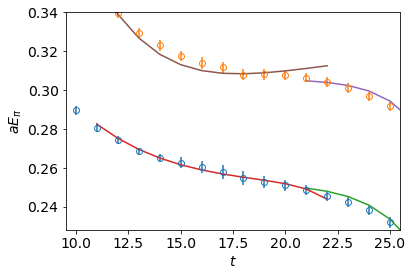

6.1631975549963505 {'a': 0.0000648(28), 'E': 0.2520(22)}
9.301285356591166 {'a0': 5(91)e-12, 'E0': -0.60(77), 'a1': 0.096(10), 'E1': 0.2506(49), 'a2': 0.323(92), 'E2': 0.537(47)}
6.213199954471305 {'a': 2.99(11)e-06, 'E': 0.3058(19)}
91.40903612257407 {'a0': -1e+01 +- 2.2e+05, 'E0': 0.5(29.5), 'a1': 0.05(11), 'E1': 0.328(58), 'a2': 1e+01 +- 2.2e+05, 'E2': 0.5(29.3)}


In [245]:
plt.errorbar([t for t in range(int(NT/2)-1)], pidata[0], pidata[1], linestyle="None", marker="o", markerfacecolor="None")
plt.errorbar([t for t in range(int(NT/2)-1)], rhodata[0], rhodata[1], linestyle="None", marker="o", markerfacecolor="None")
plt.plot([t for t in range(pibestFitTimes[0], pibestFitTimes[1]+1)],pifitFuncdata)
plt.plot([t for t in range(pibestFit2Times[0], pibestFit2Times[1]+1)],pifit2Funcdata)
plt.plot([t for t in range(rhobestFitTimes[0], rhobestFitTimes[1]+1)],rhofitFuncdata)
plt.plot([t for t in range(rhobestFit2Times[0], rhobestFit2Times[1]+1)],rhofit2Funcdata)
plt.ylim(0.228,0.34)
plt.xlim(9.5,25.5)
plt.xlabel(r'$t$')
plt.ylabel(r'$aE_{\pi}$')
plt.show()

for f in [pibestFit, pibestFit2, rhobestFit, rhobestFit2]:
    print(f.chi2, f.p)

In [248]:
print("Cosh mpi/mrho=", 0.252/0.3058)
print("Exp mpi/mrho=",0.2506/0.328)

Cosh mpi/mrho= 0.8240680183126226
Exp mpi/mrho= 0.7640243902439023


In [246]:
kappa="k0p15446"
corrPI=np.array(get_data(kappa,5,NT))
corrRHO=(np.array(get_data(kappa,1,NT))+np.array(get_data(kappa,2,NT))+np.array(get_data(kappa,3,NT)))/3.0
ts = np.array([t for t in range(int(NT/2))])

cut=120
bin=10

nmean = lambda data : np.mean(data,axis=0)

fitData=jackKnifeCov(nmean, corrPI[cut:,:], bin)
pibestFit, pibestFitTimes = get_best_cosh_fit(fitData)
pibestFit2, pibestFit2Times = get_best_exp_fit(fitData)

fitData=jackKnifeCov(nmean, corrRHO[cut:,:], bin)
rhobestFit, rhobestFitTimes = get_best_cosh_fit(fitData)
rhobestFit2, rhobestFit2Times = get_best_exp_fit(fitData)



pidata=jackKnife(log_eff_mass, corrPI[cut:,:], bin)
rhodata=jackKnife(log_eff_mass, corrRHO[cut:,:], bin)

paramsDict = lambda d : {key: d[key].mean for key in d}

pifitparams=paramsDict(pibestFit.p)
pifitFuncdata=[np.log(cosh_fit(t,pifitparams,NT)/cosh_fit(t+1,pifitparams,NT)) for t in range(pibestFitTimes[0], pibestFitTimes[1]+1)]
pifit2params=paramsDict(pibestFit2.p)
pifit2Funcdata=[np.log(three_exp(t,pifit2params)/three_exp(t+1,pifit2params)) for t in range(pibestFit2Times[0], pibestFit2Times[1]+1)]

rhofitparams=paramsDict(rhobestFit.p)
rhofitFuncdata=[np.log(cosh_fit(t,rhofitparams,NT)/cosh_fit(t+1,rhofitparams,NT)) for t in range(rhobestFitTimes[0], rhobestFitTimes[1]+1)]
rhofit2params=paramsDict(rhobestFit2.p)
rhofit2Funcdata=[np.log(three_exp(t,rhofit2params)/three_exp(t+1,rhofit2params)) for t in range(rhobestFit2Times[0], rhobestFit2Times[1]+1)]

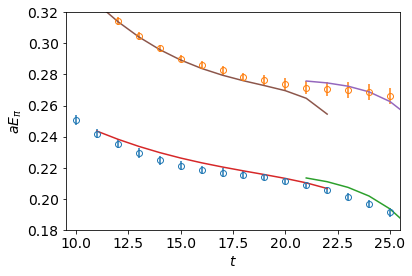

29.28993272893029 {'a': 0.0001658(90), 'E': 0.2179(17)}
7.139620345360817 {'a0': 2(43)e-08, 'E0': -0.28(98), 'a1': 0.145(25), 'E1': 0.400(93), 'a2': 0.071(33), 'E2': 0.208(20)}
7.663699654283878 {'a': 6.03(36)e-06, 'E': 0.2774(37)}
9.987101684970137 {'a0': 0.0166(16), 'E0': 0.2643(46), 'a1': 3(34)e-14, 'E1': -0.75(54), 'a2': 0.105(18), 'E2': 0.530(29)}


In [247]:
plt.errorbar([t for t in range(int(NT/2)-1)], pidata[0], pidata[1], linestyle="None", marker="o", markerfacecolor="None")
plt.errorbar([t for t in range(int(NT/2)-1)], rhodata[0], rhodata[1], linestyle="None", marker="o", markerfacecolor="None")
plt.plot([t for t in range(pibestFitTimes[0], pibestFitTimes[1]+1)],pifitFuncdata)
plt.plot([t for t in range(pibestFit2Times[0], pibestFit2Times[1]+1)],pifit2Funcdata)
plt.plot([t for t in range(rhobestFitTimes[0], rhobestFitTimes[1]+1)],rhofitFuncdata)
plt.plot([t for t in range(rhobestFit2Times[0], rhobestFit2Times[1]+1)],rhofit2Funcdata)
plt.ylim(0.18,0.32)
plt.xlim(9.5,25.5)
plt.xlabel(r'$t$')
plt.ylabel(r'$aE_{\pi}$')
plt.show()

for f in [pibestFit, pibestFit2, rhobestFit, rhobestFit2]:
    print(f.chi2, f.p)

In [249]:
print("Cosh mpi/mrho=", 0.2179/0.2774)
print("Exp mpi/mrho=",0.208/0.2643)

Cosh mpi/mrho= 0.7855082912761356
Exp mpi/mrho= 0.7869844873250095
